In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_path = "DATASET/TRAIN/"
test_path = "DATASET/TEST/"

In [3]:
categories = os.listdir(train_path)
categories

['R', 'O']

In [16]:
num_classes = 2

In [7]:
data = []
labels = []

In [11]:
for category in categories:
    folder_path = os.path.join(train_path, category)
    files_path = os.listdir(folder_path)
    for file in files_path:
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        label = file_path.split("/")[-2]
        data.append(img)
        labels.append(label)

In [12]:
len(data), len(labels)

(22564, 22564)

In [13]:
df = pd.DataFrame({"image": data, "label": labels})

In [14]:
df.head()

,image,label
0,"[[[123, 120, 103], [122, 119, 102], [122, 119,...",R
1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",R
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",R
3,"[[[169, 174, 204], [154, 161, 190], [140, 149,...",R
4,"[[[254, 254, 246], [254, 254, 246], [254, 254,...",R


In [15]:
df["label"].value_counts()

O    12565
R     9999
Name: label, dtype: int64

In [17]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

validation_generator = validation_datagen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [20]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

Epoch 1/10


2023-06-02 12:30:56.471130: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


705/705 [==============================] - 83s 117ms/step - loss: 0.4299 - accuracy: 0.8098 - val_loss: 0.3235 - val_accuracy: 0.8778
Epoch 2/10
705/705 [==============================] - 92s 131ms/step - loss: 0.3722 - accuracy: 0.8403 - val_loss: 0.3289 - val_accuracy: 0.8750
Epoch 3/10
705/705 [==============================] - 96s 137ms/step - loss: 0.3470 - accuracy: 0.8530 - val_loss: 0.3432 - val_accuracy: 0.8682
Epoch 4/10
705/705 [==============================] - 98s 139ms/step - loss: 0.3326 - accuracy: 0.8605 - val_loss: 0.3120 - val_accuracy: 0.8782
Epoch 5/10
705/705 [==============================] - 96s 136ms/step - loss: 0.3198 - accuracy: 0.8638 - val_loss: 0.3694 - val_accuracy: 0.8630
Epoch 6/10
705/705 [==============================] - 98s 138ms/step - loss: 0.3132 - accuracy: 0.8701 - val_loss: 0.2553 - val_accuracy: 0.9042
Epoch 7/10
705/705 [==============================] - 98s 139ms/step - loss: 0.3021 - accuracy: 0.8757 - val_loss: 0.2206 - val_accuracy: 0.9

In [21]:
model.save("waste.h5")

In [22]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.429878,0.809782,0.323544,0.877804
1,0.372186,0.840316,0.328871,0.875000
2,0.347034,0.852965,0.343199,0.868189
3,0.332611,0.860465,0.312037,0.878205
4,0.319797,0.863838,0.369408,0.862981


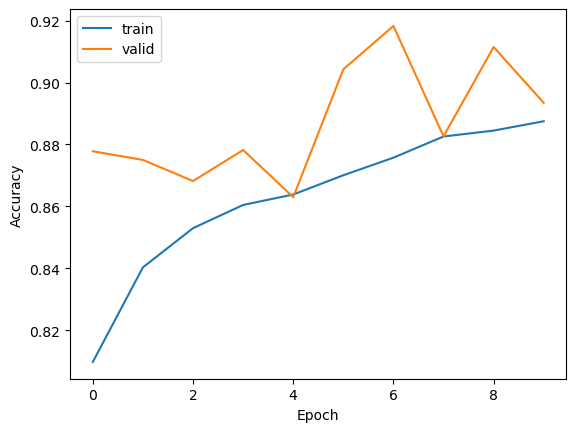

In [23]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "valid"])
plt.show()

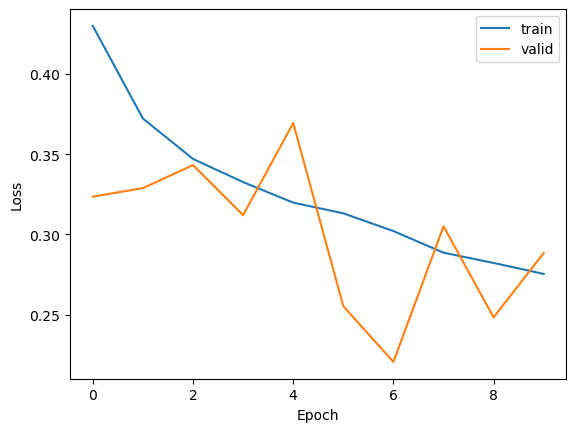

In [24]:
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "valid"])
plt.show()

In [25]:
test_loss, test_acc = model.evaluate(validation_generator)
print('Test accuracy:', test_acc)

79/79 [==============================] - 3s 33ms/step - loss: 0.2877 - accuracy: 0.8938
Test accuracy: 0.8937525153160095
